# Linear Regression 

## import library

In [11]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

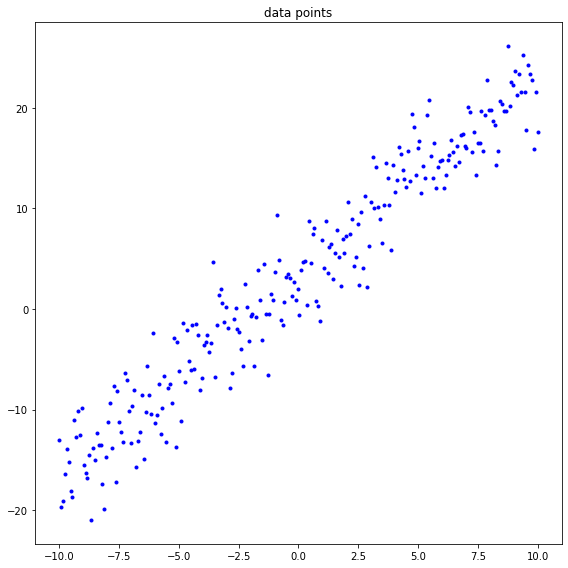

In [12]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [13]:
def compute_loss(x, y, theta0, theta1):
    func = theta0 + theta1 * x
    residual = func - y
    loss = np.sum(np.power(residual, 2)) / (2 * x.shape[0])
    
    return loss

## compute the gradient for each model parameter

In [14]:
def compute_gradient_theta0(x, y, theta0, theta1):
    func = theta0 +  theta1 * x
    residual = func - y
    
    dL = np.sum(residual) / x.shape[0]

    return dL

In [15]:
def compute_gradient_theta1(x, y, theta0, theta1):
    func = theta0 +  theta1 * x
    residual = func - y

    dL = np.sum(residual * x) / x.shape[0]


    return dL

## gradient descent for each model parameter

In [16]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x,y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x,y, theta0, theta1)
    loss    = compute_loss(x,y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 38.92372
iteration =    1, loss = 22.45805
iteration =    2, loss = 15.14235
iteration =    3, loss = 11.86256
iteration =    4, loss = 10.36354
iteration =    5, loss = 9.65082
iteration =    6, loss = 9.28587
iteration =    7, loss = 9.07528
iteration =    8, loss = 8.93374
iteration =    9, loss = 8.82363
iteration =   10, loss = 8.72832
iteration =   11, loss = 8.64046
iteration =   12, loss = 8.55681
iteration =   13, loss = 8.47590
iteration =   14, loss = 8.39708
iteration =   15, loss = 8.32004
iteration =   16, loss = 8.24463
iteration =   17, loss = 8.17075
iteration =   18, loss = 8.09837
iteration =   19, loss = 8.02743
iteration =   20, loss = 7.95791
iteration =   21, loss = 7.88977
iteration =   22, loss = 7.82299
iteration =   23, loss = 7.75754
iteration =   24, loss = 7.69339
iteration =   25, loss = 7.63052
iteration =   26, loss = 7.56890
iteration =   27, loss = 7.50851
iteration =   28, loss = 7.44932
iteration =   29, loss = 7.39130
itera

In [17]:
f = theta0 + theta1 * x

## plot the results

In [18]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')


    
    plt.tight_layout()
    plt.plot(x, y, '.', color = 'blue')
  
    plt.plot(x, f, '-', color = 'red')
    plt.show()

In [19]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot()
    plt.plot(range(0, len(loss_iteration)),loss_iteration,'-', color='red')
    plt.tight_layout()
    plt.show()

In [20]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(range(0, len(theta0_iteration)), theta0_iteration, '-', color='blue')
    plt.plot(range(0, len(theta1_iteration)), theta1_iteration,'-', color='green')
    plt.tight_layout()
    plt.show()

In [21]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)


grid_theta0, grid_theta1 = np.meshgrid(X0, X1)
grid_loss = np.array([])
for i in range(0,len(X0)):
  for j in range(0,len(X0)):
    grid_loss = np.append(grid_loss, compute_loss(x,y, grid_theta0[i, j],grid_theta1[i,j]))
    
grid_loss = grid_loss.reshape(len(X0), len(X0))

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('theta0' )
    ax.plot_surface(grid_theta0, grid_theta1, grid_loss)

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

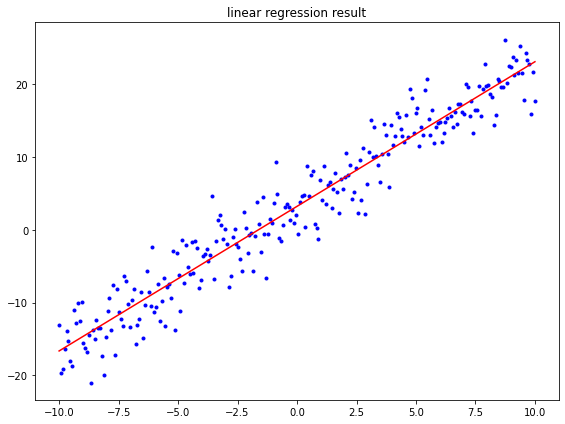

In [22]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

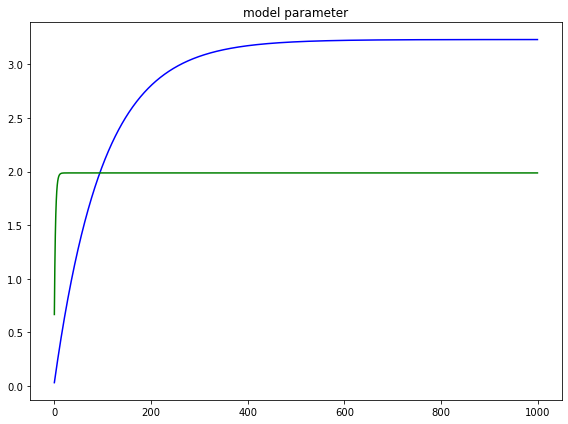

In [23]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

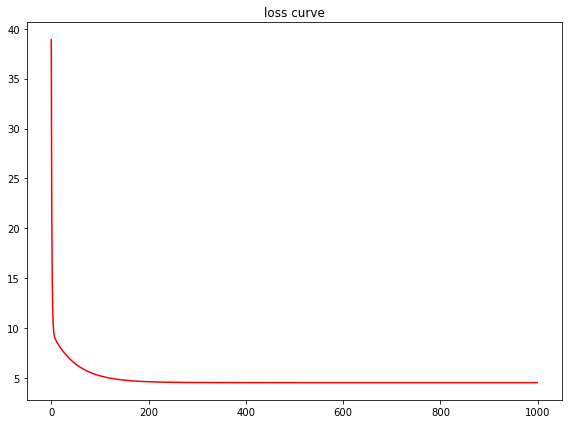

In [24]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

<ipython-input-21-933a73ab56a5>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


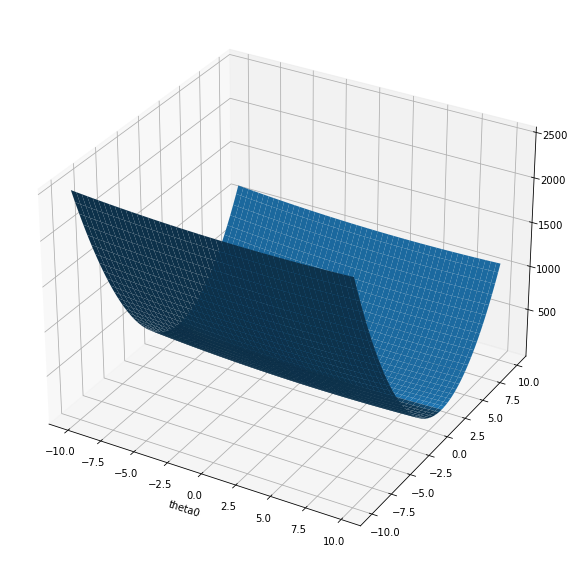

In [25]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)